# 1. Business Understanding

# 2. Data Understanding

## ⚔️IMPORTING LIBRARIES

In [1]:
!pip install xgboost

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## 🛠️LOADING DATA

In [2]:
df = pd.read_csv(r"C:\Users\Aditya P J\Documents\Python Scripts\Data\diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
52128,52129,0.60,Ideal,G,VVS2,61.3,56.0,2467,5.43,5.46,3.34
20136,20137,1.22,Ideal,H,VS2,61.3,56.0,8596,6.85,6.88,4.21
50552,50553,0.73,Ideal,F,SI2,62.1,56.0,2276,5.77,5.80,3.59
45156,45157,0.50,Ideal,D,SI1,61.6,55.0,1654,5.13,5.10,3.15
12120,12121,0.91,Premium,D,VS2,62.0,58.0,5167,6.20,6.15,3.83
25150,25151,1.50,Premium,G,VS1,60.8,61.0,13720,7.36,7.29,4.45
36556,36557,0.40,Premium,E,SI1,62.2,58.0,945,4.74,4.71,2.94
12336,12337,1.10,Ideal,G,SI1,62.3,56.0,5226,6.64,6.58,4.12
3560,3561,1.01,Premium,H,SI1,59.2,58.0,3417,6.58,6.56,3.89
47408,47409,0.50,Ideal,F,VVS2,62.3,57.0,1850,5.06,5.08,3.16


### DESKRIPSI DATA

Dataset berikut berisi informasi harga dan atribut lainnya.

~ carat (0.2-5.01): Carat adalah berat fisik berlian yang diukur dalam carat metrik. Satu carat sama dengan 0.20 gram dan dibagi menjadi 100 poin.

~ cut (Fair, Good, Very Good, Premium, Ideal): Kualitas potongan. Semakin presisi potongan berlian, semakin memikat berlian tersebut di mata sehingga dinilai dengan nilai tinggi.

~ color (dari J (worst) hingga D (best)): Warna berlian berkualitas permata muncul dalam berbagai nuansa. Dalam rentang dari tidak berwarna hingga kuning muda atau coklat muda. Berlian yang tidak berwarna adalah yang paling langka. Warna alami lainnya (seperti biru, merah, pink) dikenal sebagai "fancy," dan penilaian warnanya berbeda dari berlian putih yang tidak berwarna.

~ clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Berlian dapat memiliki karakteristik internal yang dikenal sebagai inklusi atau karakteristik eksternal yang dikenal sebagai cacat. Berlian tanpa inklusi atau cacat sangat langka; namun, sebagian besar karakteristik hanya dapat dilihat dengan pembesaran.

~ depth (43-79): Ini adalah persentase kedalaman total yang setara dengan z / mean(x, y) = 2 * z / (x + y). Kedalaman berlian adalah tingginya (dalam milimeter) yang diukur dari culet (ujung bawah) hingga meja (permukaan atas datar) seperti yang disebutkan dalam diagram berlabel di atas.

~ table (43-95): Ini adalah lebar bagian atas berlian relatif terhadap titik terlebar. Ini memberikan berlian kilauan dan kecemerlangan yang menakjubkan dengan memantulkan cahaya ke segala arah yang ketika dilihat oleh pengamat, tampak berkilau.

~ price ($326 - $18826): Ini adalah harga berlian dalam dolar AS. Ini adalah kolom target kita dalam dataset ini.

~ x (0 - 10.74): Panjang berlian (dalam mm).

~ y (0 - 58.9): Lebar berlian (dalam mm).

~ z (0 - 31.8): Kedalaman berlian (dalam mm).

## ⛓️DATA ANALYSIS

### Memeriksa nilai dan variabel kategori yang hilang

In [6]:
#Checking missing value in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Catatan :
Terdapat total data adalah 53940, berdasarkan informasi mengenai jumlah isian perkolom, terlihat bahwa jumlah baris adalah 53840. Jadi data tersebut tidak memiliki missing value. 

Tipe data (cut, color, dan clarity) adalah object, sehingga perlu di convert menjadi variabel numerik Sebelum kita memasukkan data ke dalam algoritma. 

### Mengevaluasi fitur kategorikal

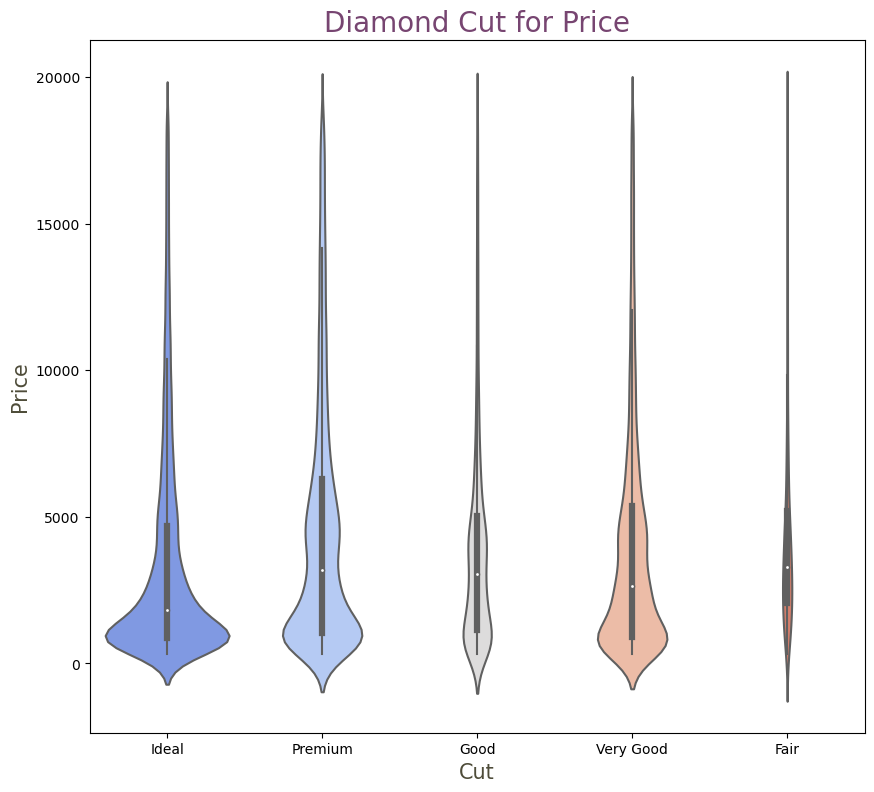

In [7]:
plt.figure(figsize=(10,9))
cols = sns.color_palette("coolwarm", 5)
ax = sns.violinplot(x="cut", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize=20)
ax.set_ylabel("Price", color="#4e4c39", fontsize=15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize=15)
plt.show()


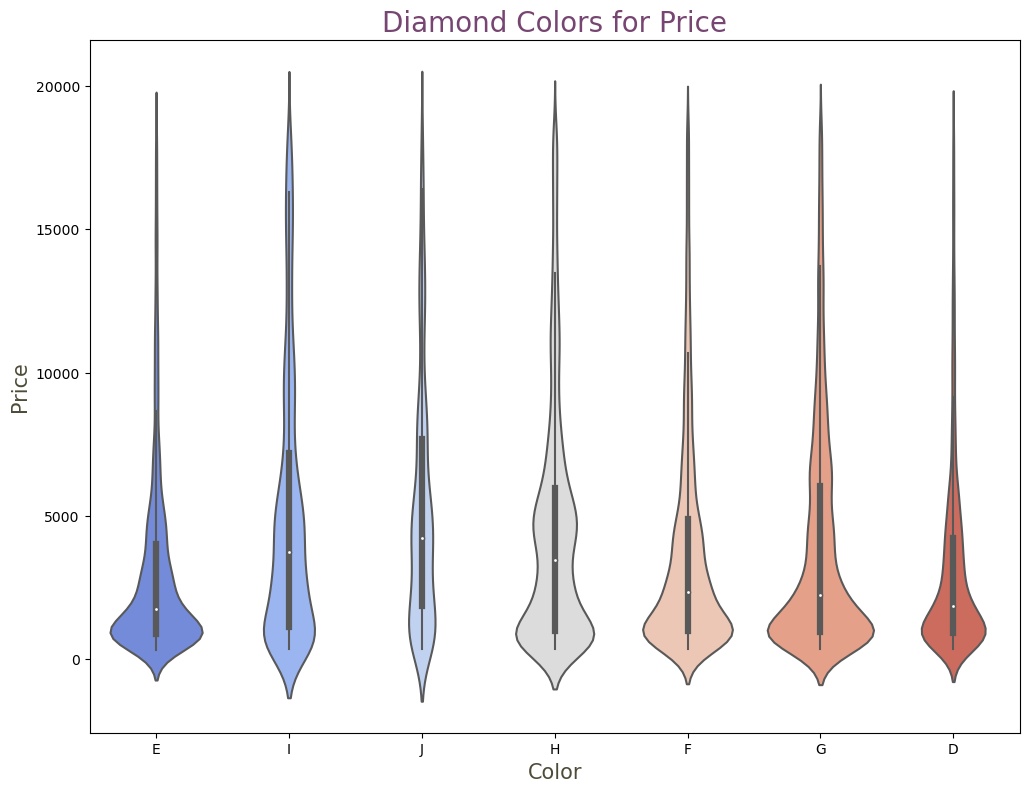

In [8]:
plt.figure(figsize=(12,9))
# Menggunakan palet warna 'coolwarm' dari seaborn
cols = sns.color_palette("coolwarm", 7)
ax = sns.violinplot(x="color", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize=20)
ax.set_ylabel("Price", color="#4e4c39", fontsize=15)
ax.set_xlabel("Color", color="#4e4c39", fontsize=15)
plt.show()


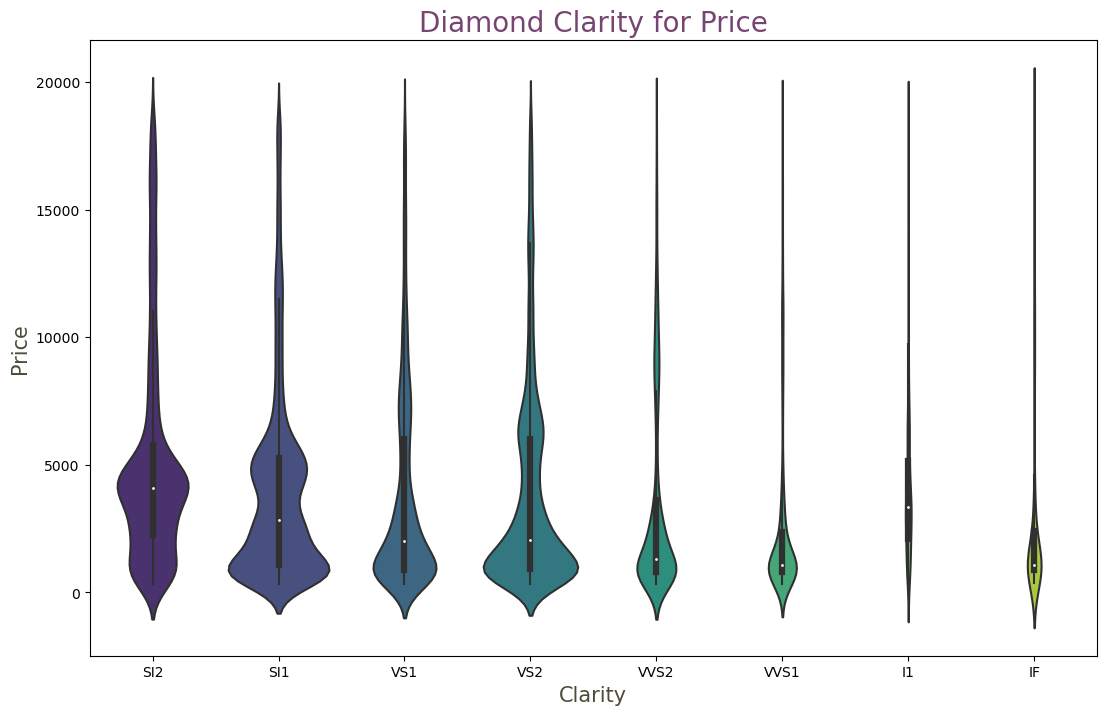

In [9]:
plt.figure(figsize=(13,8))
# Menggunakan palet warna 'viridis' dari seaborn
cols = sns.color_palette("viridis", 8)
ax = sns.violinplot(x="clarity", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize=20)
ax.set_ylabel("Price", color="#4e4c39", fontsize=15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize=15)
plt.show()


Catatan :
Potongan "Ideal" diamonds adalah yang paling banyak jumlahnya, sedangkan "Fair" diamonds adalah yang paling sedikit jumlahnya. Lebih banyak diamonds dari semua jenis potongan untuk kategori harga yang lebih rendah.

Dengan warna "J" diamonds, yang merupakan yang terburuk, sangat langka, namun "H" dan "G" diamonds lebih banyak jumlahnya meskipun kualitasnya juga rendah.

Dengan kejelasan "IF" diamonds, yang merupakan yang terbaik, serta "I1" diamonds, yang merupakan yang terburuk, sangat langka, sementara yang lainnya sebagian besar memiliki kejelasan di antara keduanya.

### Statistik Deskriptif

In [10]:
# Melakukan Analisis Univariat untuk deskripsi statistik dan pemahaman tentang sebaran data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Catatan :
    
    "Price" seperti yang diharapkan cenderung condong ke kanan, dengan jumlah titik data yang lebih banyak di sebelah kiri.
Di bawah fitur dimensional 'x', 'y', & 'z' - nilai minimum adalah 0 sehingga membuat titik data tersebut menjadi objek berlian 1D atau 2D yang tidak masuk akal - oleh karena itu perlu untuk diimputasi dengan nilai yang sesuai atau dihapus sama sekali.

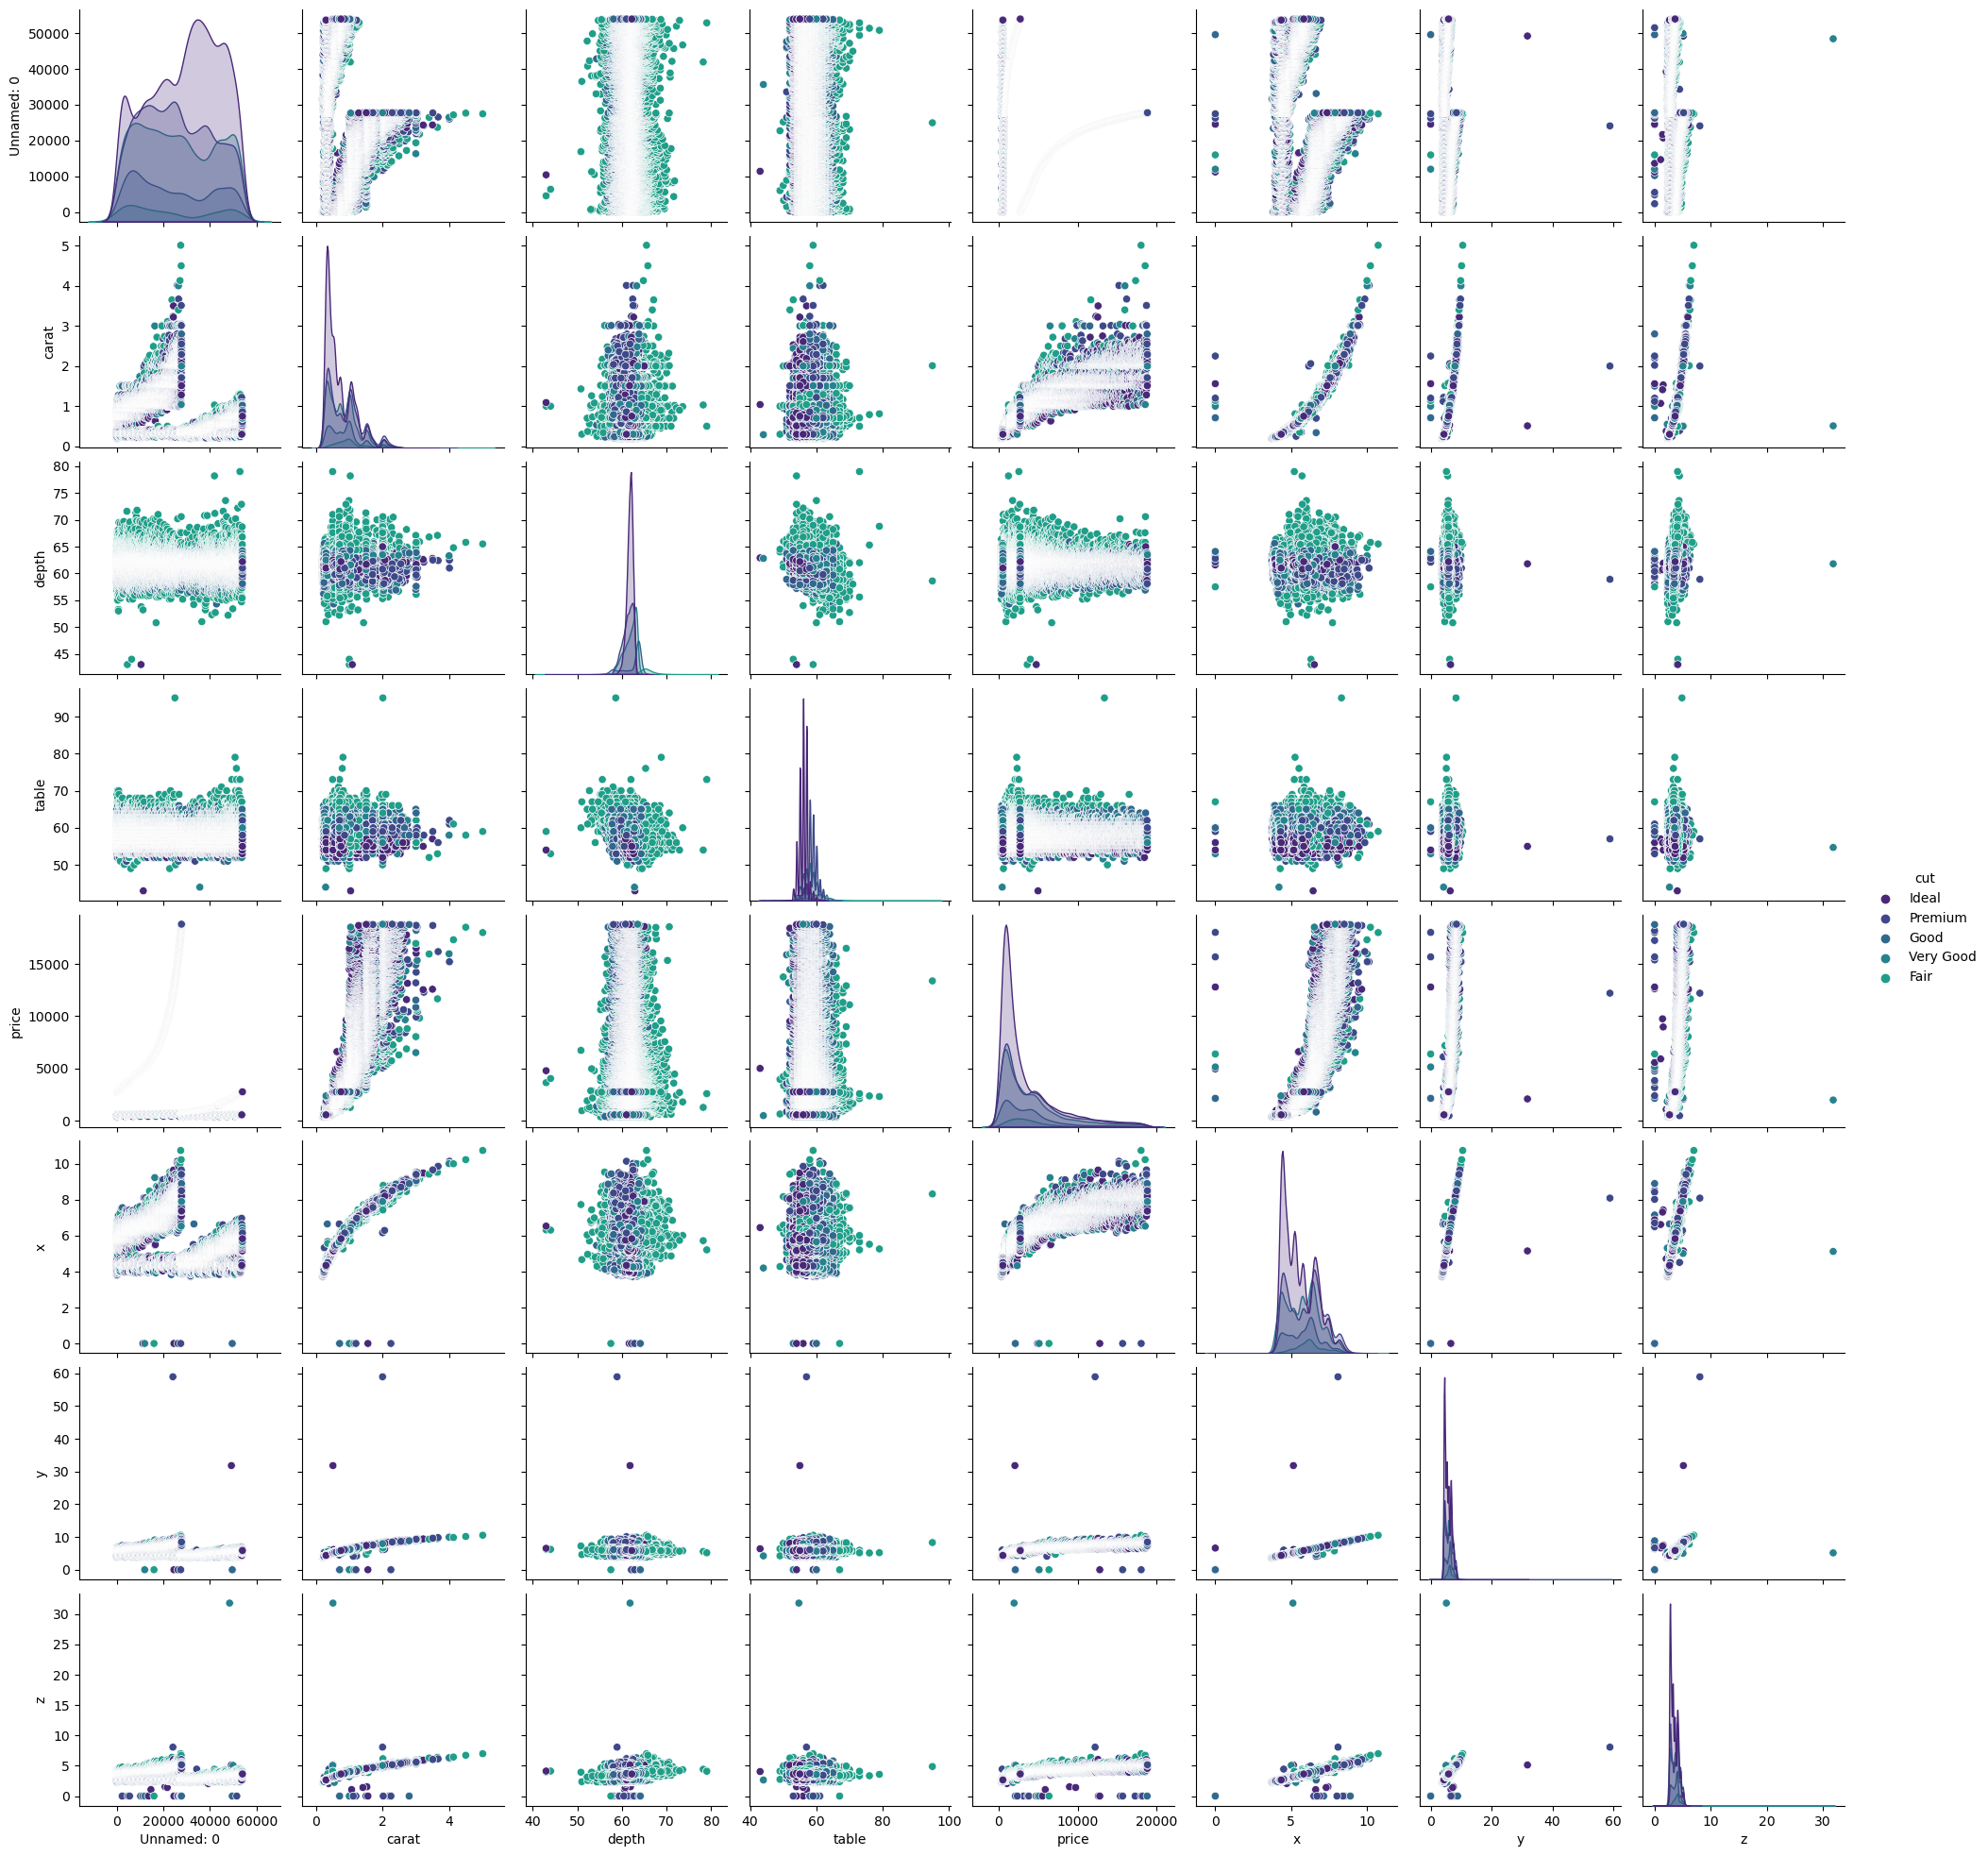

In [11]:
# Melakukan Analisis Bivariat dengan memeriksa pairplot
ax = sns.pairplot(df, hue="cut", palette=cols)


Catatan:
1. Terdapat fitur "unnamed" yang tidak berguna, yang merupakan indeks dan perlu dihilangkan.
2. Terdapat outlier yang perlu ditangani karena dapat mempengaruhi kinerja model
3. Kolom "y" dan "z" memiliki beberapa outlier dimensional dalam dataset dan perlu dihilangkan.
4. Fitur "depth" & "table" seharusnya dibatasi setelah diperiksa Plot Garis.

### Memeriksa Potensi Outlier

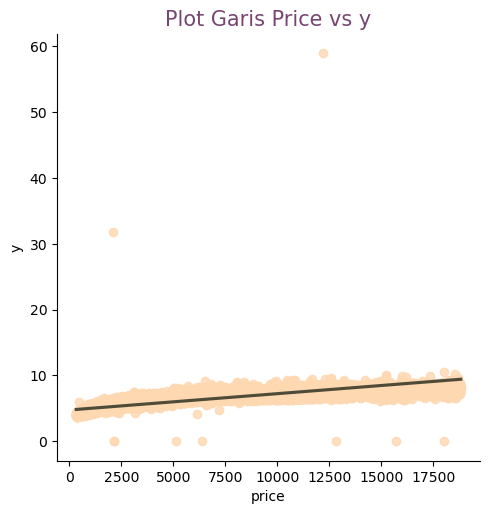

In [12]:
lm = sns.lmplot(x = 'price', y= 'y', data = df, scatter_kws = {'color': "#FED8B1"}, line_kws = {'color' : '#4e4c39'})
plt.title('Plot Garis Price vs y', color = '#774571', fontsize = 15)
plt.show()

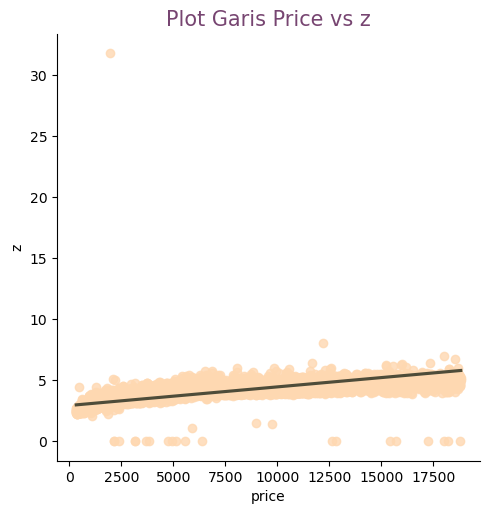

In [13]:
lm = sns.lmplot(x = 'price', y= 'z', data = df, scatter_kws = {'color': "#FED8B1"}, line_kws = {'color' : '#4e4c39'})
plt.title('Plot Garis Price vs z', color = '#774571', fontsize = 15)
plt.show()

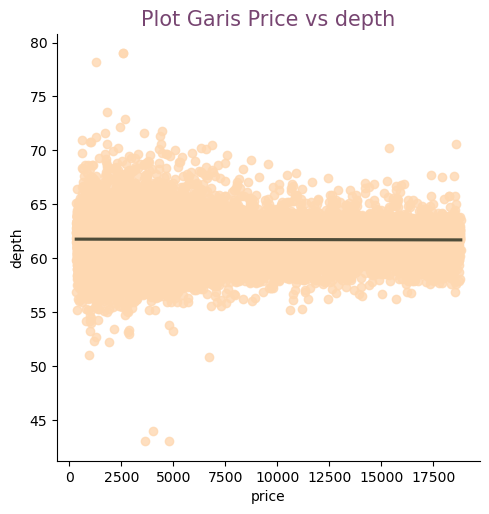

In [14]:
lm = sns.lmplot(x = 'price', y= 'depth', data = df, scatter_kws = {'color': "#FED8B1"}, line_kws = {'color' : '#4e4c39'})
plt.title('Plot Garis Price vs depth', color = '#774571', fontsize = 15)
plt.show()

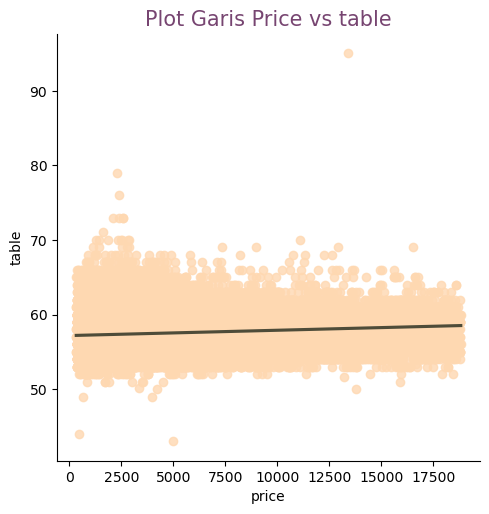

In [15]:
lm = sns.lmplot(x = 'price', y= 'table', data = df, scatter_kws = {'color': "#FED8B1"}, line_kws = {'color' : '#4e4c39'})
plt.title('Plot Garis Price vs table', color = '#774571', fontsize = 15)
plt.show()

Catatan:
Dengan melakukan plot di atas, outlier dapat dilihat dengan mudah.

## 🪛DATA PREPROCESSING

### Pembersihan Data

In [16]:
#Menghapus fitur "Unnamed"
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(53940, 10)

In [17]:
#Menghapus titik data yang memiliki nilai minimum 0 pada salah satu fitur x, y, atau z. 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

### Menghapus Ouliers

In [18]:
#Menghapus outlier (karena memiliki dataset yang besar) dengan menentukan langkah-langkah yang sesuai di seluruh fiturdf = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<40)]
df = df[(df["y"]<40)]
df = df[(df["z"]<40)&(df["z"]>2)]
df.shape

(53909, 10)

### Encoding Variabel Kategorik

In [19]:
#Membuat salinan untuk menjaga data asli dalam bentuknya yang utuh
df1 = df.copy()

#Menerapkan label encoder pada kolom-kolom dengan data kategorikal
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    df1[col] = label_encoder.fit_transform(df1[col])
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


Catatan:

Setelah fitur-fitur kategorikal dikonversi menjadi kolom-kolom numerik, kita juga mendapatkan ringkasan 5 poin bersama dengan jumlah, rata-rata, dan standar deviasi untuk mereka. 

Sekarang, kita dapat menganalisis matriks korelasi setelah selesai dengan pre-processing untuk pemilihan fitur yang mungkin guna membuat dataset lebih bersih dan optimal sebelum kita masukkan ke dalam algoritma.

### Matriks Kolerasi

<Axes: >

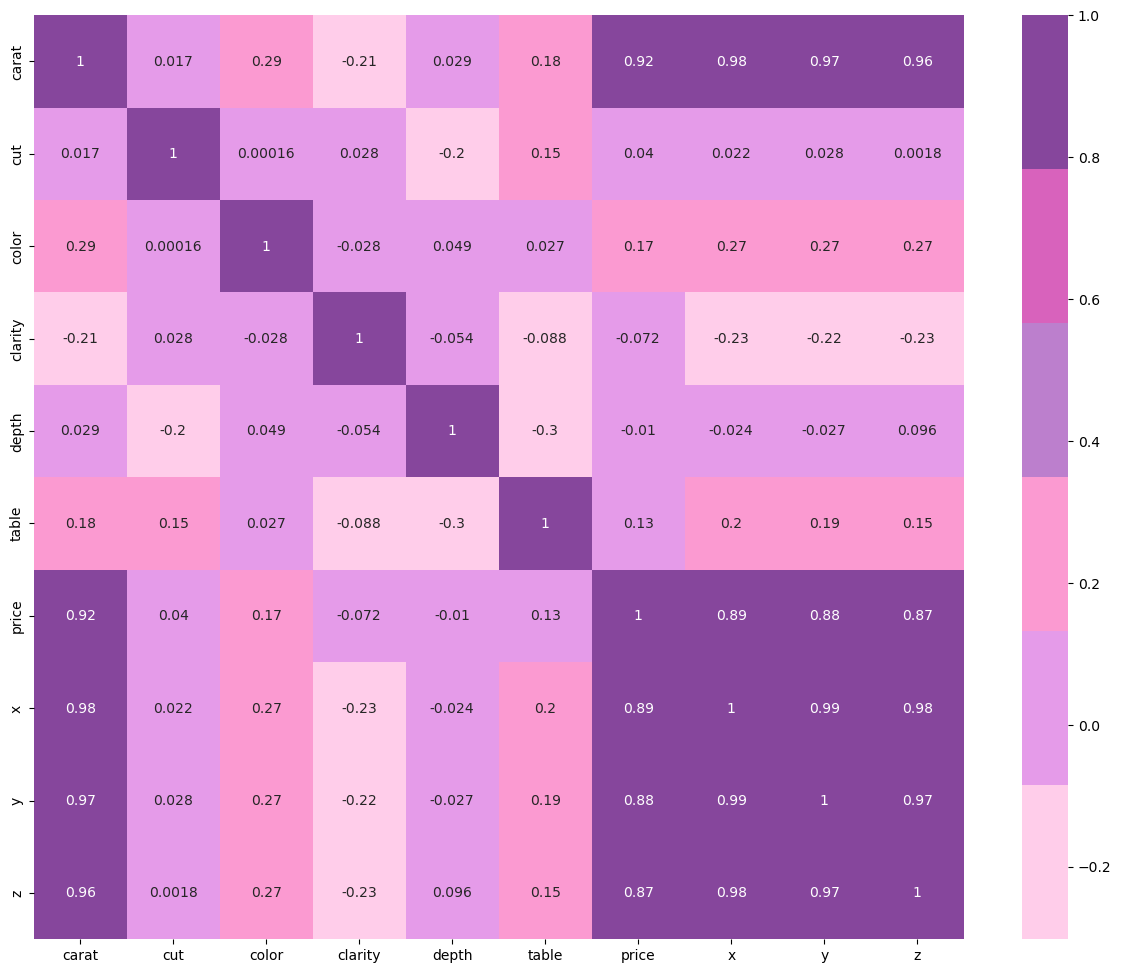

In [20]:
#Mengeksaminasi matriks korelasi menggunakan heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#FFCDEA", "#E59BE9", "#FB9AD1", "#BC7FCD", "#D862BC", "#86469C"])
corrmat= df1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

Catatan:

Fitur "carat", "x", "y", "z" memiliki korelasi yang tinggi dengan variabel target kita, yaitu harga.

Fitur "cut", "clarity", "depth" memiliki korelasi yang sangat rendah (<|0.1|) sehingga mungkin dapat dihapus, meskipun karena hanya ada beberapa fitur yang dipilih, kita tidak akan melakukannya.

## 🪅MODEL BUILDING

In [22]:
# Mendefinisikan variabel independen dan dependen
x = df1.drop(["price"],axis =1)
y = df1["price"]
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=25)

In [24]:
# Membangun Pipeline Standar Scaler dan Model untuk Berbagai Regressor

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# Daftar semua saluran pipa
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1383.854012 
Lasso: 1366.991298 
DecisionTree: 739.289291 
RandomForest: 548.841032 
KNeighbors: 816.559263 
XGBRegressor: 548.346850 


In [26]:
# Prediksi model pada data pengujian dengan XGBClassifier yang memberikan kita RMSE paling sedikit
pred = pipeline_xgb.predict(x_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R^2: 0.9821291192884176
Adjusted R^2: 0.9821141881775372


## 🪡END